In [ ]:
import copy

import numpy as np
from numpy import nan
import scipy as sp
import sklearn as sk

import pandas as pd

import math as m # math stuff
import random as rd #always good to have
import matplotlib.pyplot as plt #plots.


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import functools as ft

import itertools
import os

import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

np.random.seed(1234)
print("Import finished, \nhere's a random number:",rd.random(),"\nIf the number changed, the cell ran correctly. ")

Import finished, 
here's a random number: 0.8452380092455566 
If the number changed, the cell ran correctly. 


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

os.chdir("/content/gdrive//MyDrive/SIMS") # change to your directory
print("The path is:", os.getcwd() )
print("All the files are: ",os.listdir())

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
The path is: /content/gdrive/MyDrive/SIMS
All the files are:  ['testAlleleData', 'Generalization Plots.gsheet', 'NN_Gain.csv', 'RR_Gain.csv']


LINE PLOTS: Gain, Model Performance, Variance

Gain


In [96]:
startList = [1,7,13]

results = pd.read_csv("RR_Gain.csv")
results = results.drop(results[results['Gen']=='Variety'].index)
allYsRR = list()
x_lab = [" "," "," ","F2"," "," ","F5 "," "," "," "," ","F2"," "," ","F5"," "," "," ","F2"," "," ","F5"," "]
x = list(range(0,23))

for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYsRR.append(y)

std = pd.read_csv("RR_Gain_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTDRR = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTDRR.append(y)

####

results = pd.read_csv("NN_Gain.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYsNN = list()
x_lab = [" "," "," ","F2"," "," ","F5 "," "," "," "," ","F2"," "," ","F5"," "," "," ","F2"," "," ","F5"," "]
x = list(range(0,23))

for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYsNN.append(y)

std = pd.read_csv("NN_Gain_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTDNN = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTDNN.append(y)



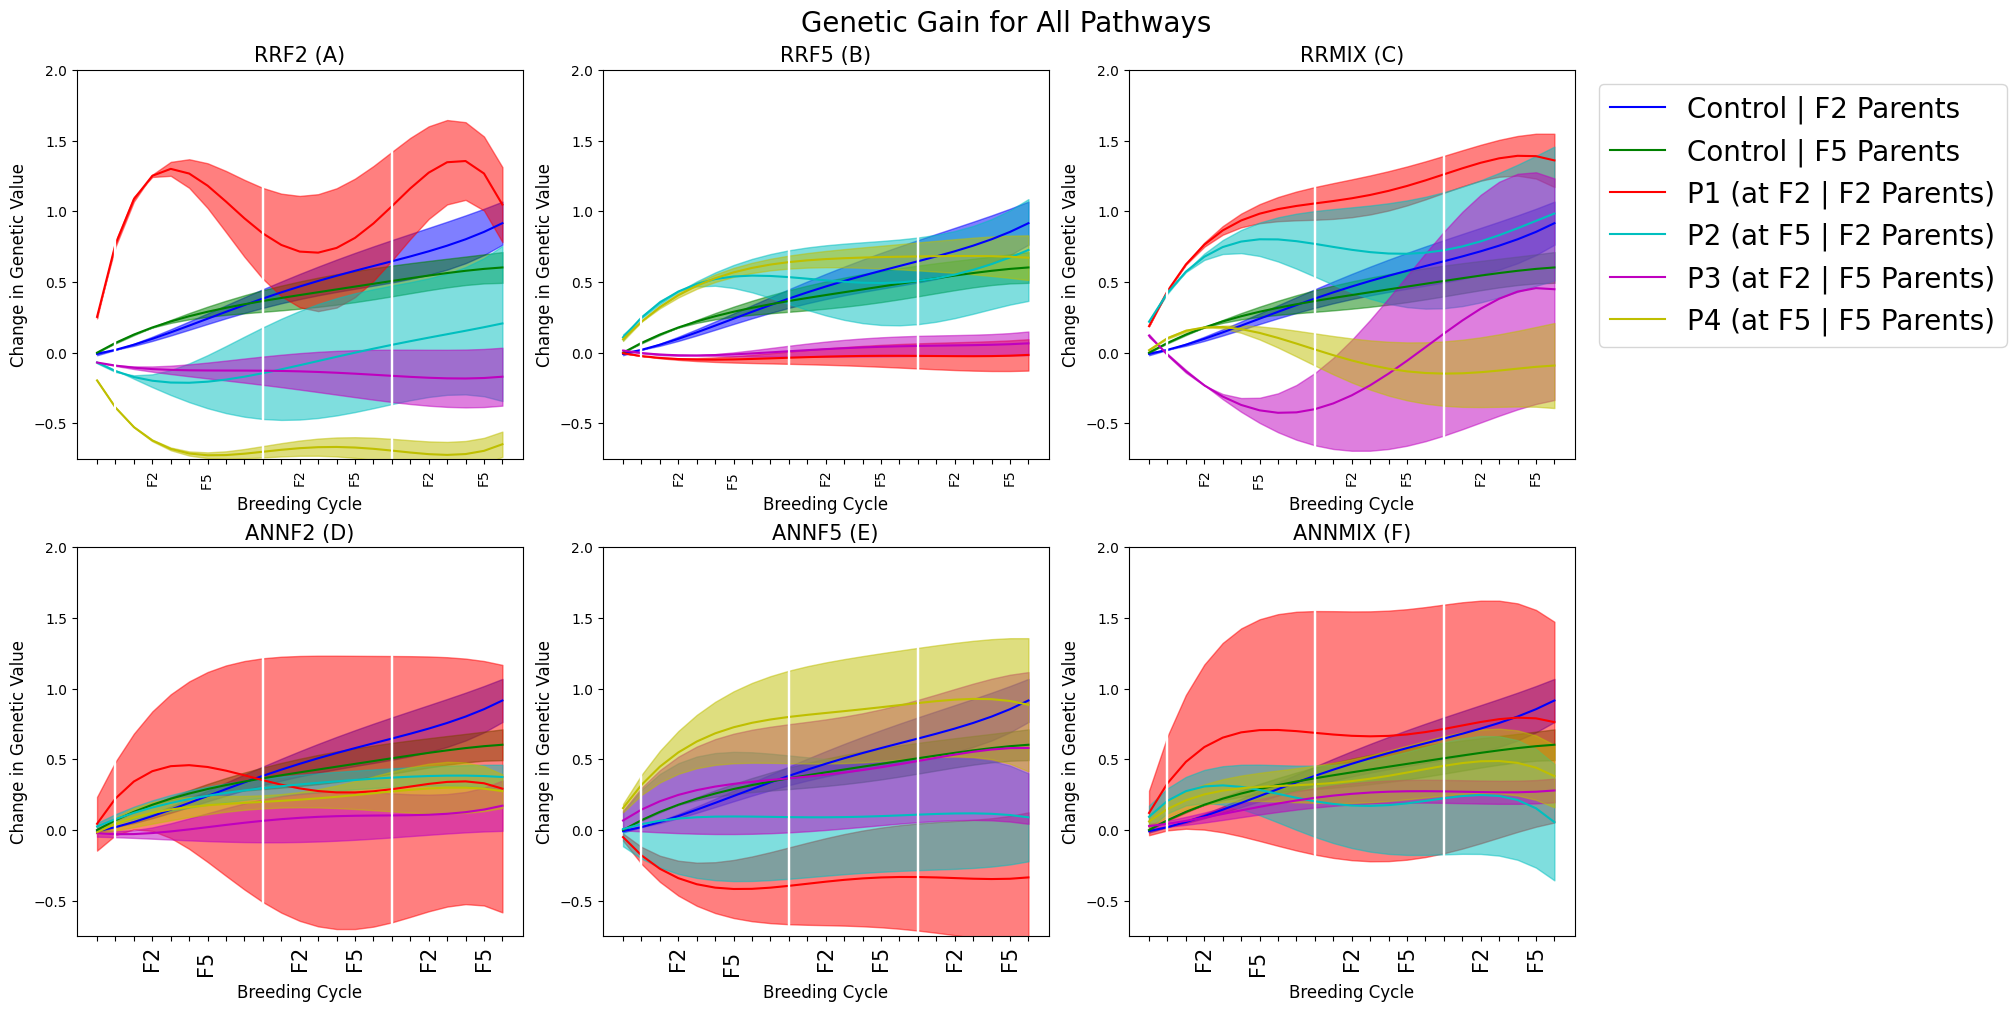

In [97]:
labels = ["RRF2 (A)", "RRF5 (B)", "RRMIX (C)","ANNF2 (D)","ANNF5 (E)","ANNMIX (F)"]
sublabels = ["Control | F2 Parents", "Control | F5 Parents", "P1 (at F2 | F2 Parents)", "P2 (at F5 | F2 Parents)", "P3 (at F2 | F5 Parents)", "P4 (at F5 | F5 Parents)"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(2, 3, figsize=(20, 10), layout='constrained')
fig.suptitle('Genetic Gain for All Pathways', fontsize=20)
color = ['b', 'g', 'r', 'c', 'm', 'y']

for trn in range(0,3):
    resp = pd.DataFrame(allYsRR[trn])
    resp['axis'] = 0.0
    std = pd.DataFrame(allSTDRR[trn])
    std['axis'] = 0.0
    for i in range(6):
        y = resp.iloc[:, i]
        value = std.iloc[:, i]
        poly = np.polyfit(x, y, 4)
        poly_y = np.poly1d(poly)(x)
        poly2 = np.polyfit(x, value, 4)
        poly_val = np.poly1d(poly2)(x)
        axs[0,trn].plot(x, poly_y, color=color[i], label=sublabels[i])
        axs[0,trn].fill_between(x, poly_y + poly_val, poly_y - poly_val, color=color[i], alpha=0.5)  # Plot every line with error bars one by one
        axs[0,trn].set_title(labels[trn],fontsize=15)  # Set title
        axs[0,trn].set_xticks(x)  # Change x-axis labels
        axs[0,trn].set_xticklabels(x_lab, rotation=90)
        axs[0,trn].set_ylim([-0.75, 2])
        axs[0,trn].axvline(x = 1, color = 'w')
        axs[0,trn].axvline(x = 9, color = 'w')
        axs[0,trn].axvline(x = 16, color = 'w')
        axs[0,trn].set_ylabel("Change in Genetic Value",fontsize=12)  # y label
        axs[0,trn].set_xlabel("Breeding Cycle",fontsize=12)  # y label
        if trn == 2:
          axs[0,trn].legend(loc='upper right', bbox_to_anchor=(2, 1),fontsize=20)

for trn in range(0,3):
    resp = pd.DataFrame(allYsNN[trn])
    resp['axis'] = 0.0
    std = pd.DataFrame(allSTDNN[trn])
    std['axis'] = 0.0
    for i in range(6):
        y = resp.iloc[:, i]
        value = std.iloc[:, i]
        poly = np.polyfit(x, y, 4)
        poly_y = np.poly1d(poly)(x)
        poly2 = np.polyfit(x, value, 4)
        poly_val = np.poly1d(poly2)(x)
        axs[1,trn].plot(x, poly_y, color=color[i], label=sublabels[i])
        axs[1,trn].fill_between(x, poly_y + poly_val, poly_y - poly_val, color=color[i], alpha=0.5)  # Plot every line with error bars one by one
        axs[1,trn].set_title(labels[trn+3],fontsize=15)  # Set title
        axs[1,trn].set_xticks(x)  # Change x-axis labels
        axs[1,trn].set_xticklabels(x_lab, rotation=90,fontsize=15)
        axs[1,trn].set_ylim([-0.75, 2])
        axs[1,trn].axvline(x = 1, color = 'w')
        axs[1,trn].axvline(x = 9, color = 'w')
        axs[1,trn].axvline(x = 16, color = 'w')
        axs[1,trn].set_ylabel("Change in Genetic Value",fontsize=12)  # y label
        axs[1,trn].set_xlabel("Breeding Cycle",fontsize=12)  # y label

plt.show()



In [98]:
startList = [1,7,13]

results = pd.read_csv("RRVAR.csv")
results = results.drop(results[results['Gen']=='Variety'].index)
allYsRR = list()
x_lab = [" "," "," ","F2"," "," ","F5"," "," "," "," ","F2"," "," ","F5"," "," "," "," ","F2"," "," ","F5"," "" ",]
x = list(range(0,24))

for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYsRR.append(y)

std = pd.read_csv("RRVAR_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTDRR = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTDRR.append(y)

####

results = pd.read_csv("NNVAR.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYsNN = list()
x_lab = [" "," "," ","F2"," "," ","F5"," "," "," "," ","F2"," "," ","F5"," "," "," "," ","F2"," "," ","F5"," "" ",]
x = list(range(0,24))

for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYsNN.append(y)

std = pd.read_csv("NNVAR_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTDNN = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTDNN.append(y)



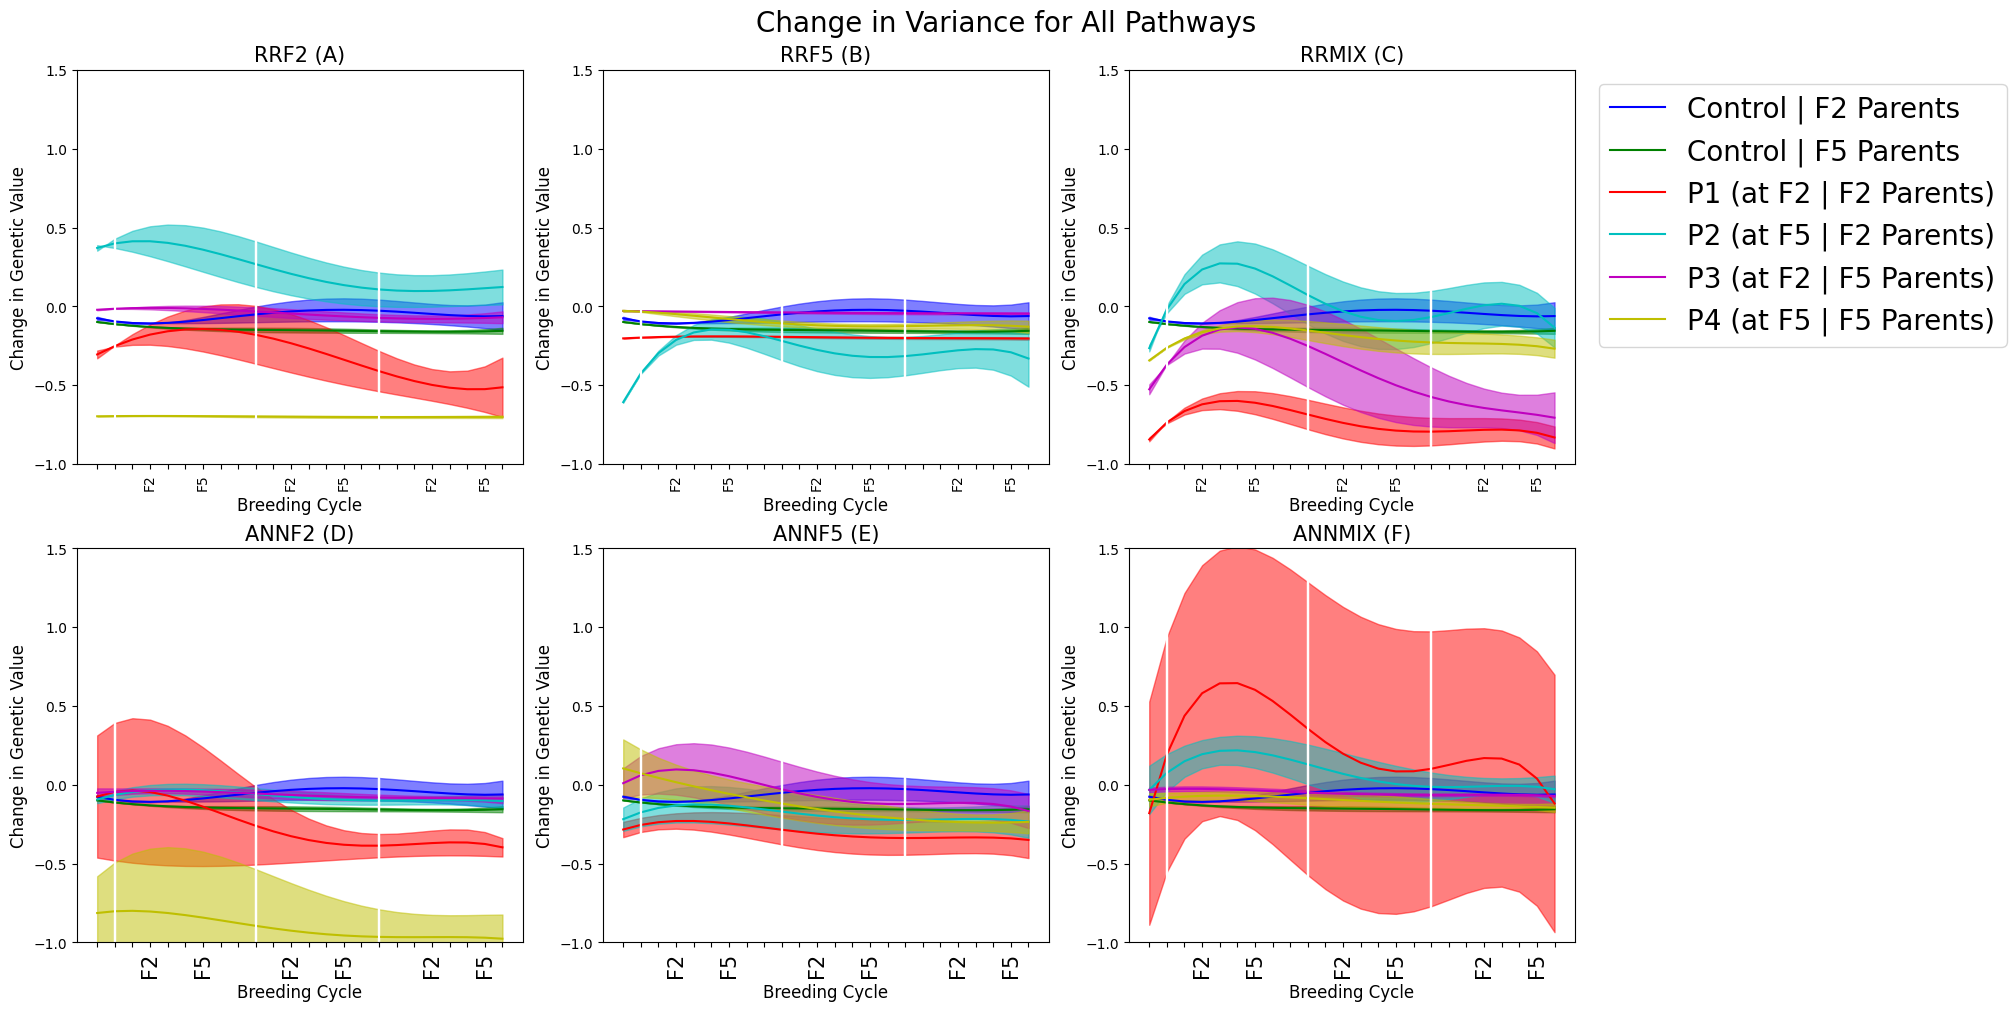

In [99]:
labels = ["RRF2 (A)", "RRF5 (B)", "RRMIX (C)","ANNF2 (D)","ANNF5 (E)","ANNMIX (F)"]
sublabels = ["Control | F2 Parents", "Control | F5 Parents", "P1 (at F2 | F2 Parents)", "P2 (at F5 | F2 Parents)", "P3 (at F2 | F5 Parents)", "P4 (at F5 | F5 Parents)"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(2, 3, figsize=(20, 10), layout='constrained')
fig.suptitle('Change in Variance for All Pathways', fontsize=20)
color = ['b', 'g', 'r', 'c', 'm', 'y']

for trn in range(0,3):
    resp = pd.DataFrame(allYsRR[trn])
    resp = resp.dropna()
    resp['axis'] = 0.0
    std = pd.DataFrame(allSTDRR[trn])
    std = std.dropna()
    std['axis'] = 0.0
    for i in range(6):
        y = resp.iloc[:, i]
        value = std.iloc[:, i]
        poly = np.polyfit(x, y, 4)
        poly_y = np.poly1d(poly)(x)
        poly2 = np.polyfit(x, value, 4)
        poly_val = np.poly1d(poly2)(x)
        axs[0,trn].plot(x, poly_y, color=color[i], label=sublabels[i])
        axs[0,trn].fill_between(x, poly_y + poly_val, poly_y - poly_val, color=color[i], alpha=0.5)  # Plot every line with error bars one by one
        axs[0,trn].set_title(labels[trn],fontsize=15)  # Set title
        axs[0,trn].set_xticks(x)  # Change x-axis labels
        axs[0,trn].set_xticklabels(x_lab, rotation=90)
        axs[0,trn].set_ylim([-1, 1.5])
        axs[0,trn].axvline(x = 1, color = 'w')
        axs[0,trn].axvline(x = 9, color = 'w')
        axs[0,trn].axvline(x = 16, color = 'w')
        axs[0,trn].set_ylabel("Change in Genetic Value",fontsize=12)  # y label
        axs[0,trn].set_xlabel("Breeding Cycle",fontsize=12)  # y label
        if trn == 2:
          axs[0,trn].legend(loc='upper right', bbox_to_anchor=(2, 1),fontsize=20)

for trn in range(0,3):
    resp = pd.DataFrame(allYsNN[trn])
    resp = resp.dropna()
    resp['axis'] = 0.0
    std = pd.DataFrame(allSTDNN[trn])
    std = std.dropna()
    std['axis'] = 0.0
    for i in range(6):
        y = resp.iloc[:, i]
        value = std.iloc[:, i]
        poly = np.polyfit(x, y, 4)
        poly_y = np.poly1d(poly)(x)
        poly2 = np.polyfit(x, value, 4)
        poly_val = np.poly1d(poly2)(x)
        axs[1,trn].plot(x, poly_y, color=color[i], label=sublabels[i])
        axs[1,trn].fill_between(x, poly_y + poly_val, poly_y - poly_val, color=color[i], alpha=0.5)  # Plot every line with error bars one by one
        axs[1,trn].set_title(labels[trn+3],fontsize=15)  # Set title
        axs[1,trn].set_xticks(x)  # Change x-axis labels
        axs[1,trn].set_xticklabels(x_lab, rotation=90,fontsize=15)
        axs[1,trn].set_ylim([-1, 1.5])
        axs[1,trn].axvline(x = 1, color = 'w')
        axs[1,trn].axvline(x = 9, color = 'w')
        axs[1,trn].axvline(x = 16, color = 'w')
        axs[1,trn].set_ylabel("Change in Genetic Value",fontsize=12)  # y label
        axs[1,trn].set_xlabel("Breeding Cycle",fontsize=12)  # y label

plt.show()



In [100]:
startList = [1,5,9]

results = pd.read_csv("rrCor.csv")
results = results.drop(results[results['Gen']=='Variety'].index)
allYsRR = list()
x_lab = [" ","F2 ",""," ","F5",""," "," ","F2 ",""," ","F5",""," "," ","F2",""," ","F5 ",""," ",]
x = list(range(0,21))

for dims in startList:
  y = results.iloc[:,dims:dims+4]
  allYsRR.append(y)

std = pd.read_csv("rrCorSTD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTDRR = list()
for dims in startList:
  y = std.iloc[:,dims:dims+4]
  allSTDRR.append(y)

####

results = pd.read_csv("nnCor.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYsNN = list()
x_lab = [" ","F2 ",""," ","F5",""," "," ","F2 ",""," ","F5",""," "," ","F2",""," ","F5 ",""," ",]
x = list(range(0,21))

for dims in startList:
  y = results.iloc[:,dims:dims+4]
  allYsNN.append(y)

std = pd.read_csv("nnCorSTD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTDNN = list()
for dims in startList:
  y = std.iloc[:,dims:dims+4]
  allSTDNN.append(y)


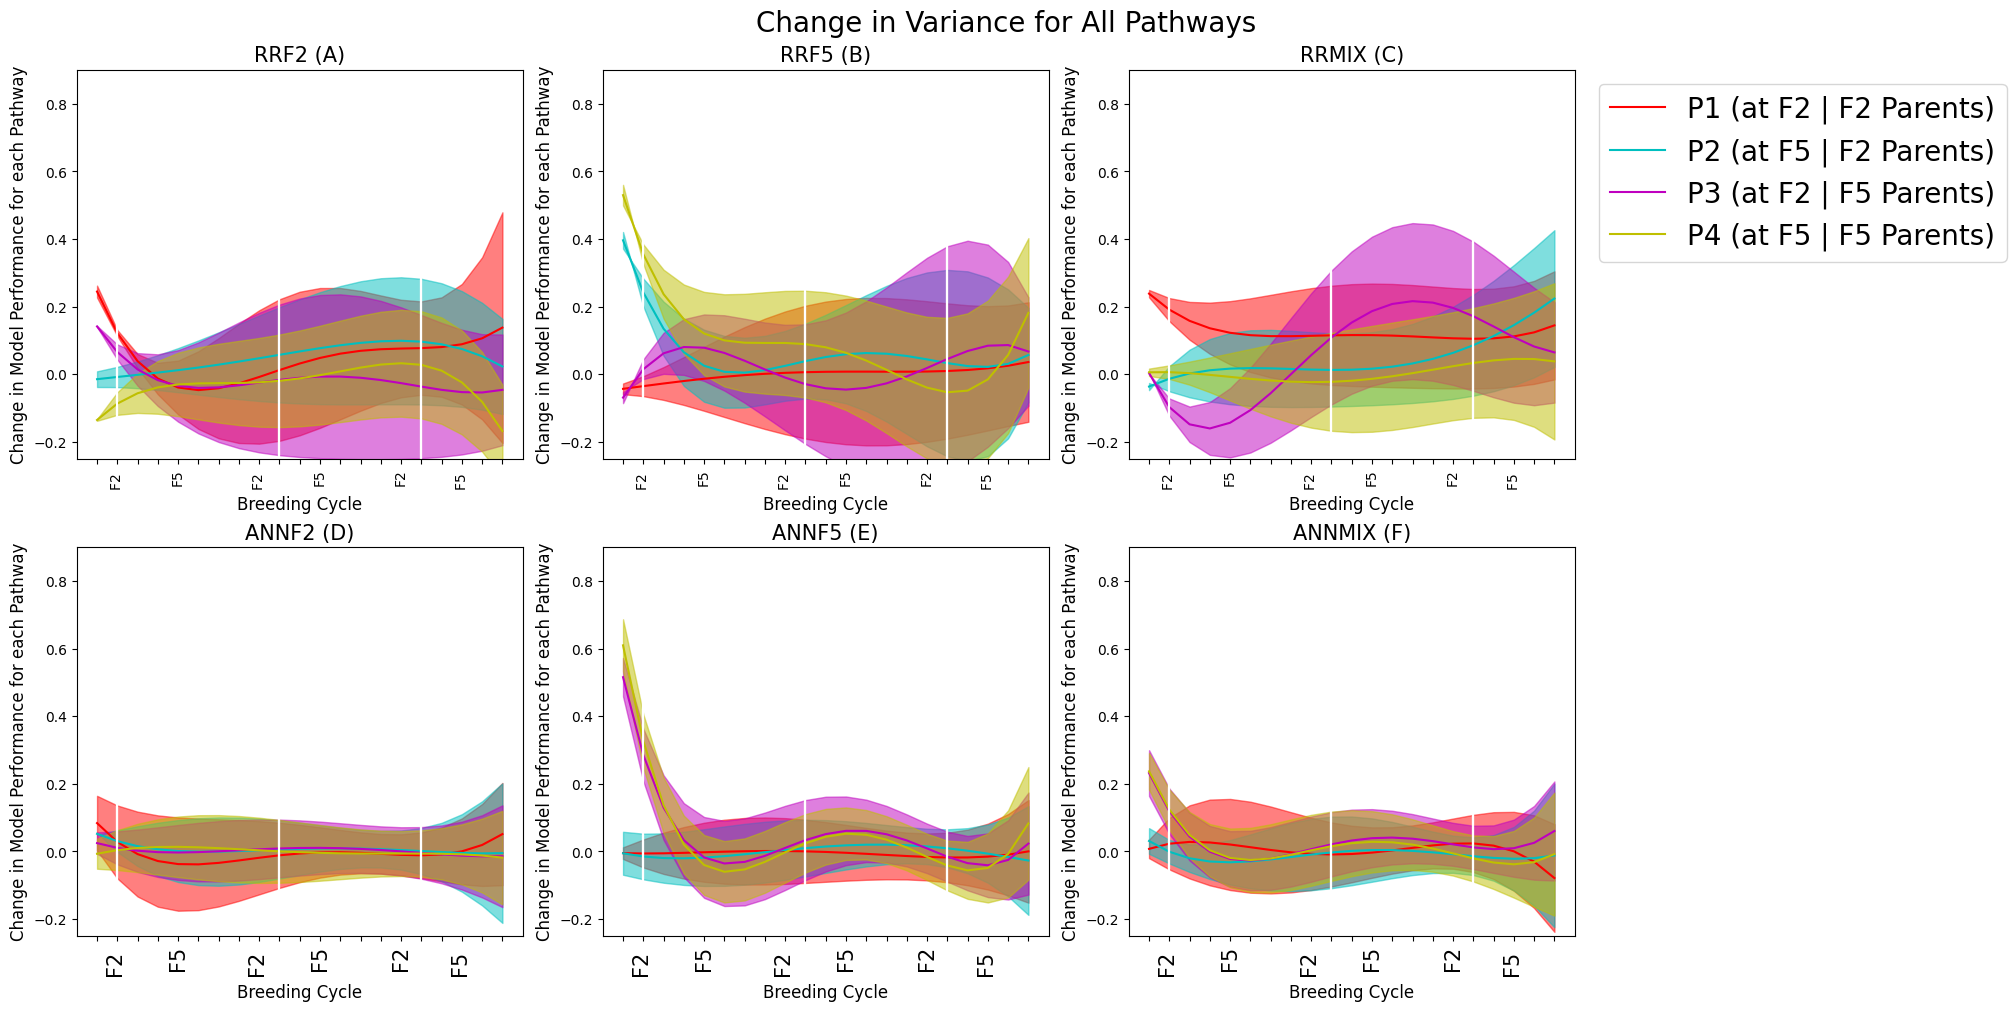

In [101]:
labels = ["RRF2 (A)", "RRF5 (B)", "RRMIX (C)","ANNF2 (D)","ANNF5 (E)","ANNMIX (F)"]
sublabels = ["P1 (at F2 | F2 Parents)", "P2 (at F5 | F2 Parents)", "P3 (at F2 | F5 Parents)", "P4 (at F5 | F5 Parents)"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(2, 3, figsize=(20, 10), layout='constrained')
fig.suptitle('Change in Variance for All Pathways', fontsize=20)
color = ['r', 'c', 'm', 'y']

for trn in range(0,3):
    resp = pd.DataFrame(allYsRR[trn])
    resp = resp.dropna()
    resp['axis'] = 0.0
    std = pd.DataFrame(allSTDRR[trn])
    std = std.dropna()
    std['axis'] = 0.0
    for i in range(4):
        y = resp.iloc[:, i]
        value = std.iloc[:, i]
        poly = np.polyfit(x, y, 4)
        poly_y = np.poly1d(poly)(x)
        poly2 = np.polyfit(x, value, 4)
        poly_val = np.poly1d(poly2)(x)
        axs[0,trn].plot(x, poly_y, color=color[i], label=sublabels[i])
        axs[0,trn].fill_between(x, poly_y + poly_val, poly_y - poly_val, color=color[i], alpha=0.5)  # Plot every line with error bars one by one
        axs[0,trn].set_title(labels[trn],fontsize=15)  # Set title
        axs[0,trn].set_xticks(x)  # Change x-axis labels
        axs[0,trn].set_xticklabels(x_lab, rotation=90)
        axs[0,trn].set_ylim([-.25, .9])
        axs[0,trn].axvline(x = 1, color = 'w')
        axs[0,trn].axvline(x = 9, color = 'w')
        axs[0,trn].axvline(x = 16, color = 'w')
        axs[0,trn].set_ylabel("Change in Model Performance for each Pathway",fontsize=12)  # y label
        axs[0,trn].set_xlabel("Breeding Cycle",fontsize=12)  # y label
        if trn == 2:
          axs[0,trn].legend(loc='upper right', bbox_to_anchor=(2, 1),fontsize=20)

for trn in range(0,3):
    resp = pd.DataFrame(allYsNN[trn])
    resp = resp.dropna()
    resp['axis'] = 0.0
    std = pd.DataFrame(allSTDNN[trn])
    std = std.dropna()
    std['axis'] = 0.0
    for i in range(4):
        y = resp.iloc[:, i]
        value = std.iloc[:, i]
        poly = np.polyfit(x, y, 4)
        poly_y = np.poly1d(poly)(x)
        poly2 = np.polyfit(x, value, 4)
        poly_val = np.poly1d(poly2)(x)
        axs[1,trn].plot(x, poly_y, color=color[i], label=sublabels[i])
        axs[1,trn].fill_between(x, poly_y + poly_val, poly_y - poly_val, color=color[i], alpha=0.5)  # Plot every line with error bars one by one
        axs[1,trn].set_title(labels[trn+3],fontsize=15)  # Set title
        axs[1,trn].set_xticks(x)  # Change x-axis labels
        axs[1,trn].set_xticklabels(x_lab, rotation=90,fontsize=15)
        axs[1,trn].set_ylim([-.25, .9])
        axs[1,trn].axvline(x = 1, color = 'w')
        axs[1,trn].axvline(x = 9, color = 'w')
        axs[1,trn].axvline(x = 16, color = 'w')
        axs[1,trn].set_ylabel("Change in Model Performance for each Pathway",fontsize=12)  # y label
        axs[1,trn].set_xlabel("Breeding Cycle",fontsize=12)  # y label

plt.show()

